In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import FastText
import numpy as np

In [2]:
fp = open("../texts/deephaven.txt").read()
sentences = sent_tokenize(fp)
sentences = [word_tokenize(s) for s in sentences]
sentences = [[t.lower() for t in s] for s in sentences]

In [3]:
model = FastText(sentences,min_count=2)

In [4]:
model.wv.most_similar("town")

[('overgrown', 0.9999754428863525),
 ('grown', 0.9999749660491943),
 ('ground', 0.9999743700027466),
 ('winter', 0.9999735355377197),
 ('towne', 0.9999726414680481),
 ('around', 0.999971330165863),
 ('grounds', 0.9999706745147705),
 ('windows', 0.9999701976776123),
 ('winter-time', 0.9999701380729675),
 ('townspeople', 0.9999698400497437)]

In [5]:
from gensim.models import KeyedVectors
google_model = KeyedVectors.load_word2vec_format("../models/google-vectors.w2v",binary=True)

In [8]:
vocab = list(google_model.key_to_index.keys())

In [9]:
types = list(set([t for s in sentences for t in s]))
types = [t for t in types if t in vocab]
embs = [google_model[t] for t in types]

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
dist_matrix = 1 - cosine_similarity(embs)

In [11]:
for i in np.argsort(dist_matrix[types.index("town")])[:25]:
    print(types[i])

town
city
village
towns
castle
picturesque
county
bustling
quaint
quay
near
district
streets
fort
located
cathedral
island
cove
cities
villages
houses
charlestown
suburbs
thoroughfares
settlement


In [12]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

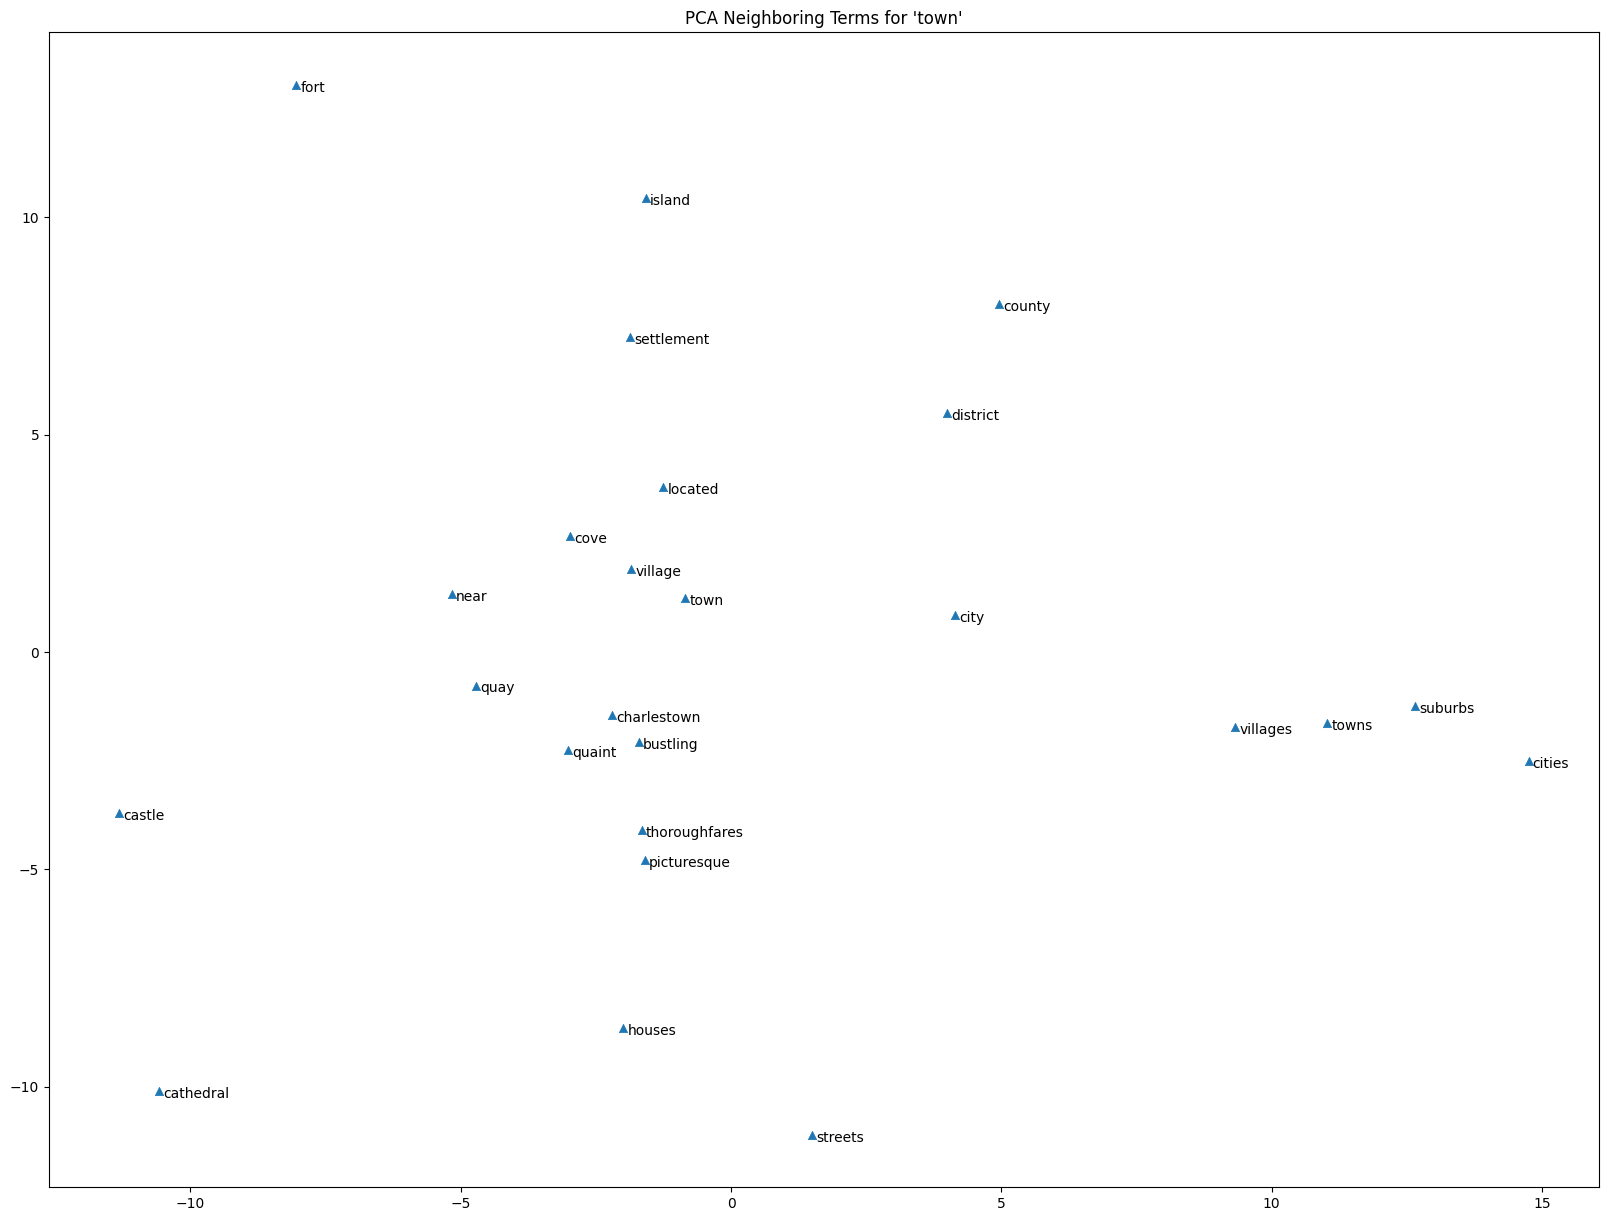

In [13]:
pca = PCA(n_components = 2)

neighbor_types = [types[t] for t in np.argsort(dist_matrix[types.index("town")])[:25]]
neighbor_embs = [google_model[t] for t in neighbor_types]

plot_data = pca.fit_transform(neighbor_embs)
xs, ys = plot_data[:, 0], plot_data[:, 1]

fig = plt.figure(figsize=(20, 15))
plt.clf()
plt.title("PCA Neighboring Terms for 'town'")
plt.style.use('ggplot')
plt.scatter(xs, ys, marker = '^')
for i, w in enumerate(neighbor_types):
     plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
        textcoords = 'offset points', ha = 'left', va = 'top')
plt.show()  